In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, ticker

In [2]:
df = pd.read_csv('titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246


In [3]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [4]:
df.drop(columns={'id', 'description', 'release_year', 'age_certification', 'imdb_id', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'}, inplace=True)

In [5]:
df

,title,type,runtime,genres,production_countries,seasons,imdb_score
0,Five Came Back: The Reference Films,SHOW,51,['documentation'],['US'],1.0,NaN
1,Rocky,MOVIE,119,"['drama', 'sport']",['US'],NaN,8.1
2,Grease,MOVIE,110,"['romance', 'comedy']",['US'],NaN,7.2
3,The Sting,MOVIE,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,8.3
4,Rocky II,MOVIE,119,"['drama', 'sport']",['US'],NaN,7.3
...,...,...,...,...,...,...,...
6132,عبود في البيت,MOVIE,81,"['family', 'comedy']",['KW'],NaN,NaN
6133,Sweetie,MOVIE,120,['documentation'],['TR'],NaN,7.9
6134,Sommore: Queen Chandelier,MOVIE,69,['comedy'],['US'],NaN,6.1
6135,All Na Vibes,MOVIE,80,['drama'],['NG'],NaN,5.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6137 non-null   object 
 1   type                  6137 non-null   object 
 2   runtime               6137 non-null   int64  
 3   genres                6137 non-null   object 
 4   production_countries  6137 non-null   object 
 5   seasons               2306 non-null   float64
 6   imdb_score            5669 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 335.7+ KB


In [7]:
df.isna().sum()

title                      0
type                       0
runtime                    0
genres                     0
production_countries       0
seasons                 3831
imdb_score               468
dtype: int64

In [8]:
df['type'].value_counts()

type
MOVIE    3831
SHOW     2306
Name: count, dtype: int64

In [9]:
df['production_countries'].value_counts()

production_countries
['US']                            1981
['IN']                             633
['JP']                             278
['KR']                             259
['GB']                             235
                                  ... 
['BR', 'CA']                         1
['MX', 'ES', 'UY']                   1
['FR', 'DE', 'IT', 'ES', 'AR']       1
['UY', 'AR', 'BR', 'FR', 'DE']       1
['KE', 'TZ', 'NG']                   1
Name: count, Length: 438, dtype: int64

In [10]:
df_no_missing = df[df['imdb_score'].isna() == False]

In [11]:
df_no_missing.isna().sum()

title                      0
type                       0
runtime                    0
genres                     0
production_countries       0
seasons                 3526
imdb_score                 0
dtype: int64

In [12]:
missing_imdb = df[df['imdb_score'].isna()]
missing_imdb

,title,type,runtime,genres,production_countries,seasons,imdb_score
0,Five Came Back: The Reference Films,SHOW,51,['documentation'],['US'],1.0,NaN
113,One Last Shot,MOVIE,30,[],[],NaN,NaN
123,Evangelion: Death (True)²,MOVIE,69,"['animation', 'scifi', 'action', 'drama']",['JP'],NaN,NaN
154,My First Errand,SHOW,18,['reality'],['JP'],12.0,NaN
155,Escalona,SHOW,44,['drama'],['CO'],1.0,NaN
...,...,...,...,...,...,...,...
6117,Rana Naidu,SHOW,48,"['action', 'crime', 'drama']",['IN'],1.0,NaN
6118,Copenhagen Cowboy: Nightcall with Nicolas Wind...,MOVIE,27,['documentation'],[],NaN,NaN
6123,Have a Nice Day!,MOVIE,93,"['drama', 'comedy']",['MX'],NaN,NaN
6131,Do Your Worst,MOVIE,91,"['drama', 'romance', 'comedy']",['ZA'],NaN,NaN


In [13]:
df

,title,type,runtime,genres,production_countries,seasons,imdb_score
0,Five Came Back: The Reference Films,SHOW,51,['documentation'],['US'],1.0,NaN
1,Rocky,MOVIE,119,"['drama', 'sport']",['US'],NaN,8.1
2,Grease,MOVIE,110,"['romance', 'comedy']",['US'],NaN,7.2
3,The Sting,MOVIE,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,8.3
4,Rocky II,MOVIE,119,"['drama', 'sport']",['US'],NaN,7.3
...,...,...,...,...,...,...,...
6132,عبود في البيت,MOVIE,81,"['family', 'comedy']",['KW'],NaN,NaN
6133,Sweetie,MOVIE,120,['documentation'],['TR'],NaN,7.9
6134,Sommore: Queen Chandelier,MOVIE,69,['comedy'],['US'],NaN,6.1
6135,All Na Vibes,MOVIE,80,['drama'],['NG'],NaN,5.2


In [14]:
df['imdb_score'].isna().sum()

468

In [15]:
df_no_missing.head()

,title,type,runtime,genres,production_countries,seasons,imdb_score
1,Rocky,MOVIE,119,"['drama', 'sport']",['US'],NaN,8.1
2,Grease,MOVIE,110,"['romance', 'comedy']",['US'],NaN,7.2
3,The Sting,MOVIE,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,8.3
4,Rocky II,MOVIE,119,"['drama', 'sport']",['US'],NaN,7.3
5,Monty Python and the Holy Grail,MOVIE,91,"['fantasy', 'comedy']",['GB'],NaN,8.2


In [16]:
df_no_missing['imdb_score'].value_counts()

imdb_score
6.6    228
6.8    226
6.5    225
7.1    208
7.2    202
      ... 
1.7      1
1.6      1
2.0      1
1.9      1
2.5      1
Name: count, Length: 79, dtype: int64

In [17]:
content_with_9_and_above = df_no_missing[df_no_missing['imdb_score'] >= 9.0]
content_with_9_and_above

,title,type,runtime,genres,production_countries,seasons,imdb_score
127,Okupas,SHOW,40,"['drama', 'crime']",['AR'],1.0,9.0
186,Breaking Bad,SHOW,48,"['drama', 'comedy', 'crime', 'thriller']",['US'],5.0,9.5
192,Avatar: The Last Airbender,SHOW,24,"['animation', 'action', 'family', 'fantasy']",['US'],3.0,9.3
201,The Dark Knight,MOVIE,152,"['drama', 'thriller', 'action', 'crime']","['GB', 'US']",NaN,9.0
204,DEATH NOTE,SHOW,24,"['animation', 'drama', 'fantasy', 'thriller', ...",['JP'],1.0,9.0
209,The Lord of the Rings: The Return of the King,MOVIE,201,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,9.0
529,Khawatir,SHOW,19,"['reality', 'scifi', 'family']",[],11.0,9.5
540,Hunter x Hunter,SHOW,23,"['action', 'drama', 'animation', 'comedy', 'fa...",['JP'],1.0,9.0
677,Attack on Titan,SHOW,23,"['horror', 'animation', 'action', 'drama', 'fa...",['JP'],4.0,9.0
1062,Reply 1988,SHOW,71,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,9.2


In [18]:
content_with_9_and_above['genres'].values

array(["['drama', 'crime']", "['drama', 'comedy', 'crime', 'thriller']",
       "['animation', 'action', 'family', 'fantasy']",
       "['drama', 'thriller', 'action', 'crime']",
       "['animation', 'drama', 'fantasy', 'thriller', 'crime']",
       "['fantasy', 'action', 'drama']", "['reality', 'scifi', 'family']",
       "['action', 'drama', 'animation', 'comedy', 'fantasy']",
       "['horror', 'animation', 'action', 'drama', 'fantasy', 'scifi']",
       "['comedy', 'drama', 'family', 'romance']", "['drama', 'family']",
       "['reality']", '[]', "['drama', 'history']",
       "['documentation', 'history', 'sport']", "['documentation']",
       "['comedy', 'drama']",
       "['scifi', 'action', 'drama', 'animation', 'fantasy']",
       "['animation']"], dtype=object)

# Created a function to count genres using given dataframes

In [19]:
def count_genres(genre, dataframecol):
    gen_count = 0
    for genres in dataframecol['genres']:
        if str(genre) in genres:
            gen_count+=1
    print(f'{genre} genre count is: {gen_count}')

In [20]:
dict_genre = {'genre': ['drama', 'thriller', 'horror', 'comedy', 'romance', 'sport', 'family', 'animation', 'reality',
                        'scifi', 'documentation', 'history', 'action', 'crime']}
for i in dict_genre['genre']:
    count_genres(i, content_with_9_and_above)

drama genre count is: 12
thriller genre count is: 3
horror genre count is: 1
comedy genre count is: 4
romance genre count is: 1
sport genre count is: 1
family genre count is: 4
animation genre count is: 6
reality genre count is: 2
scifi genre count is: 3
documentation genre count is: 2
history genre count is: 2
action genre count is: 6
crime genre count is: 4


In [21]:
content_with_9_and_above['production_countries'].value_counts()

production_countries
['US']          5
['JP']          3
[]              3
['KR']          2
['GB']          2
['AR']          1
['GB', 'US']    1
['NZ', 'US']    1
['IN']          1
Name: count, dtype: int64

# Plot

In [22]:
gen = content_with_9_and_above['genres']
gen           

127                                    ['drama', 'crime']
186              ['drama', 'comedy', 'crime', 'thriller']
192          ['animation', 'action', 'family', 'fantasy']
201              ['drama', 'thriller', 'action', 'crime']
204     ['animation', 'drama', 'fantasy', 'thriller', ...
209                        ['fantasy', 'action', 'drama']
529                        ['reality', 'scifi', 'family']
540     ['action', 'drama', 'animation', 'comedy', 'fa...
677     ['horror', 'animation', 'action', 'drama', 'fa...
1062             ['comedy', 'drama', 'family', 'romance']
1849                                  ['drama', 'family']
2343                                          ['reality']
2634                                                   []
2640                                 ['drama', 'history']
2663                ['documentation', 'history', 'sport']
3186                                    ['documentation']
3256                                  ['comedy', 'drama']
4289    ['scif

In [23]:
light_colors = [
    '#FFCCCB',  
    '#FFD700',  
    '#F0E68C', 
    '#87CEEB',  
    '#98FB98',  
    '#FFA07A', 
    '#FFE4C4',  
    '#FFDAB9',  
    '#FFEBCD',  
    '#FFDEAD',  
    '#FFA500',  
    '#FFD700',  
    '#D2B48C',  
    '#FFA07A',  
    '#FFB6C1',  
    '#F0E68C',  
    '#ADD8E6',  
    '#87CEFA',  
    '#FFC0CB'   
]

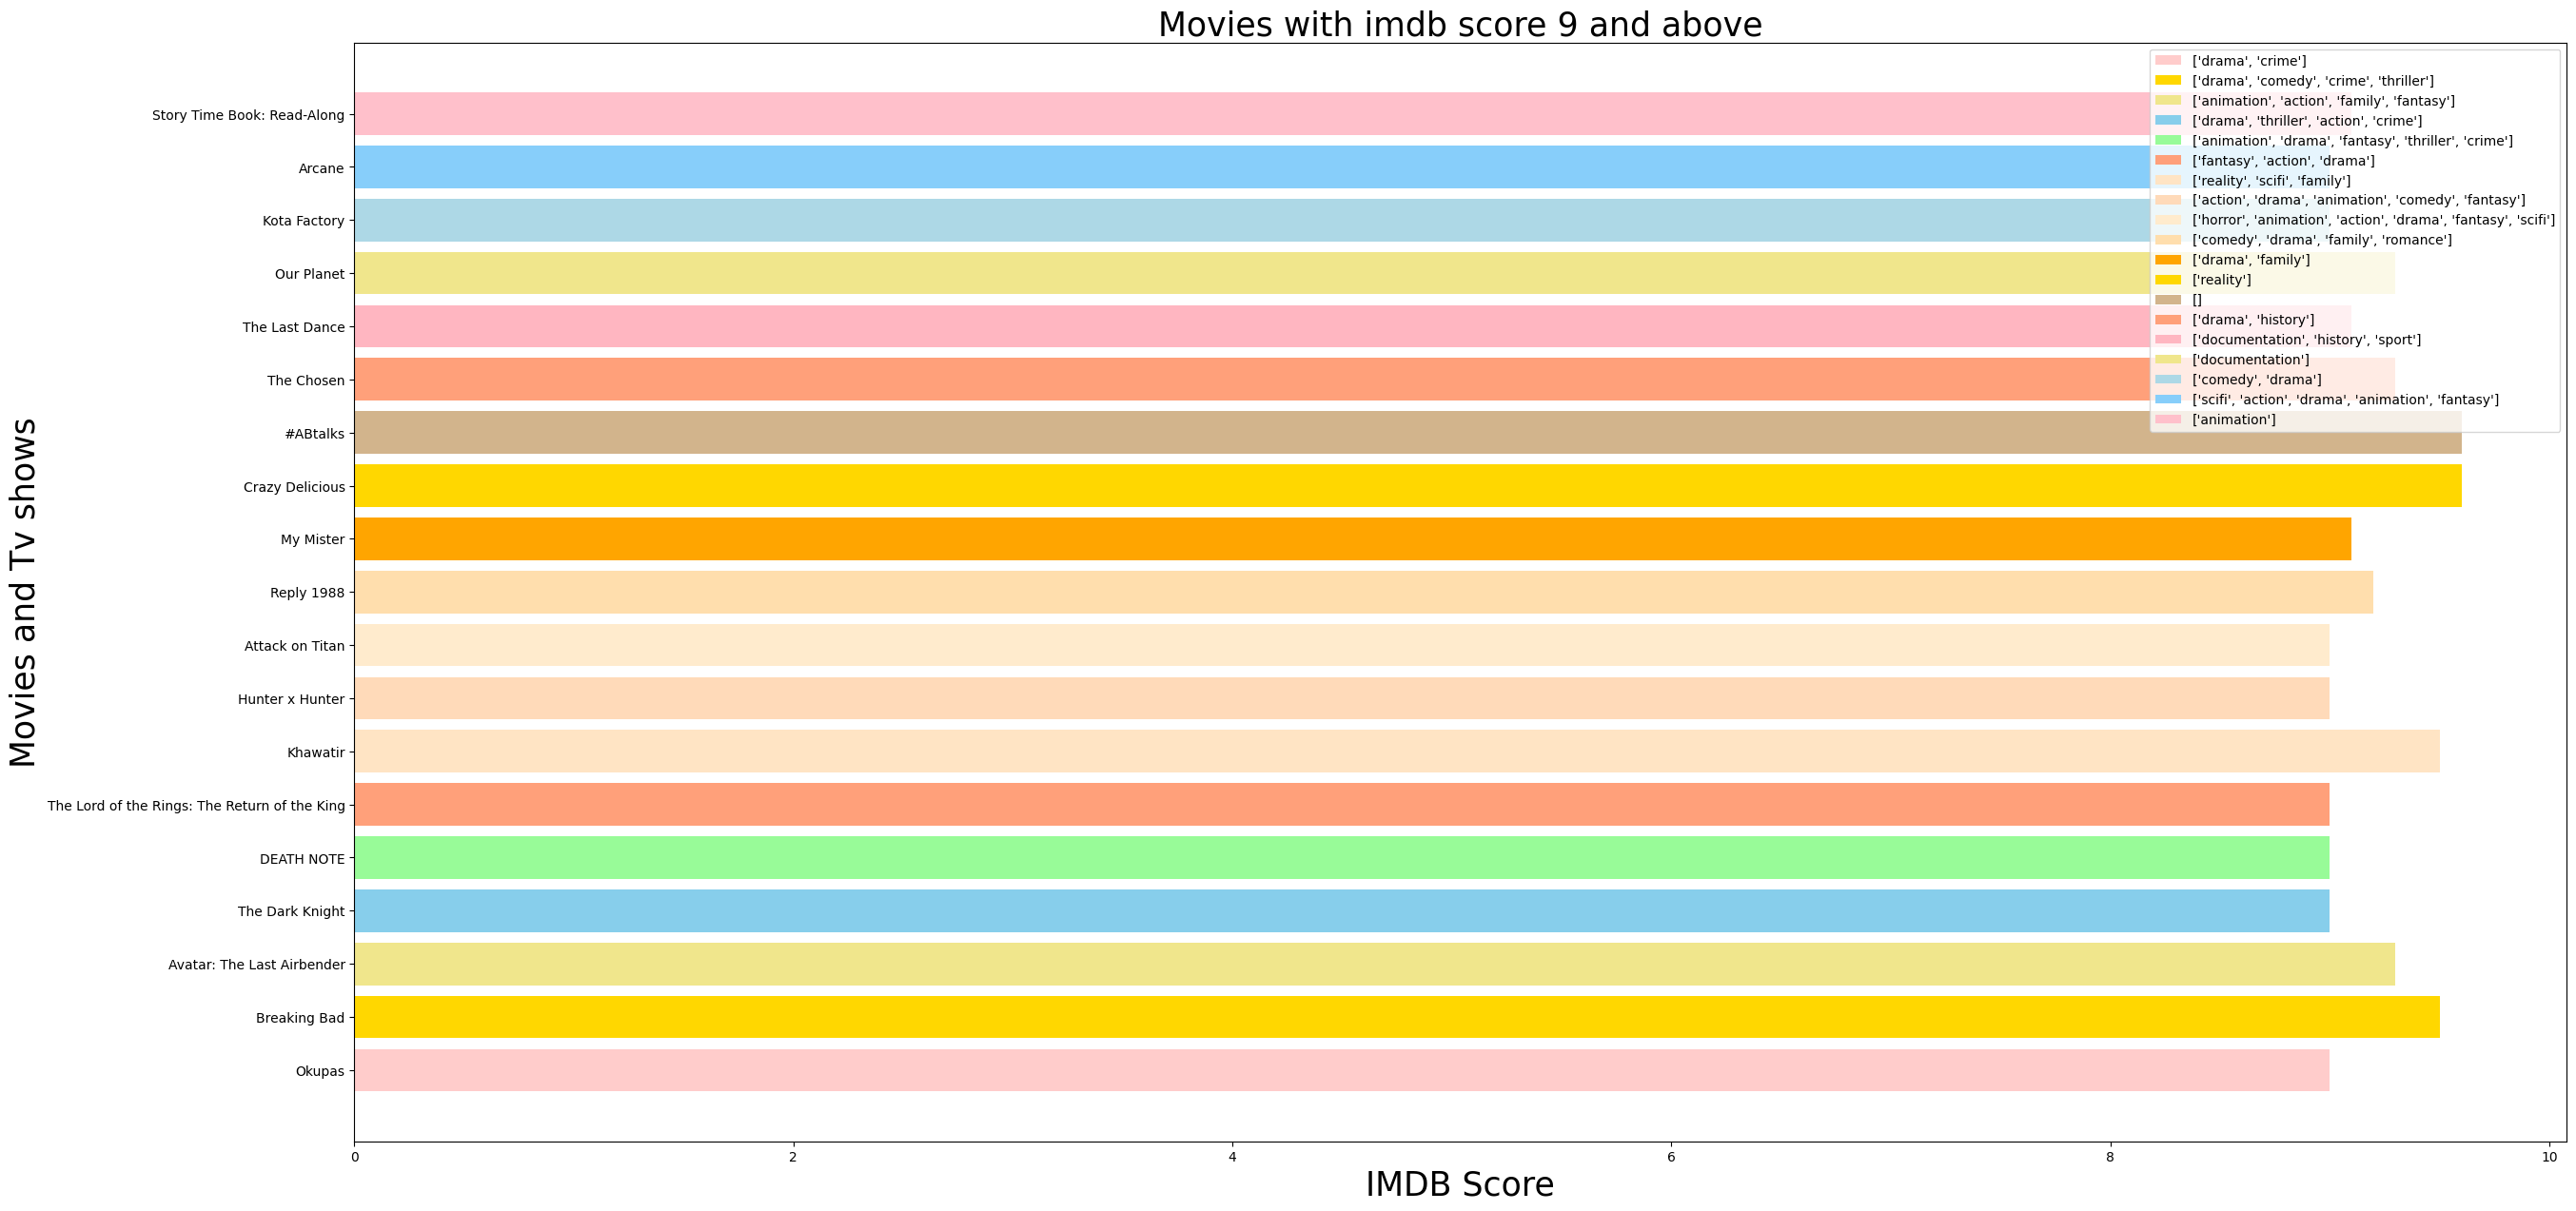

In [24]:
plt.figure(figsize=(30, 15))
plt.title('Movies with imdb score 9 and above', size=25)
plt.xlabel('IMDB Score', size=25)
plt.ylabel('Movies and Tv shows', size=25)
plt.barh(content_with_9_and_above['title'], content_with_9_and_above['imdb_score'], label=gen, color=light_colors)
plt.legend(loc='best')
plt.show()

In [25]:
content_with_9_and_above

,title,type,runtime,genres,production_countries,seasons,imdb_score
127,Okupas,SHOW,40,"['drama', 'crime']",['AR'],1.0,9.0
186,Breaking Bad,SHOW,48,"['drama', 'comedy', 'crime', 'thriller']",['US'],5.0,9.5
192,Avatar: The Last Airbender,SHOW,24,"['animation', 'action', 'family', 'fantasy']",['US'],3.0,9.3
201,The Dark Knight,MOVIE,152,"['drama', 'thriller', 'action', 'crime']","['GB', 'US']",NaN,9.0
204,DEATH NOTE,SHOW,24,"['animation', 'drama', 'fantasy', 'thriller', ...",['JP'],1.0,9.0
209,The Lord of the Rings: The Return of the King,MOVIE,201,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,9.0
529,Khawatir,SHOW,19,"['reality', 'scifi', 'family']",[],11.0,9.5
540,Hunter x Hunter,SHOW,23,"['action', 'drama', 'animation', 'comedy', 'fa...",['JP'],1.0,9.0
677,Attack on Titan,SHOW,23,"['horror', 'animation', 'action', 'drama', 'fa...",['JP'],4.0,9.0
1062,Reply 1988,SHOW,71,"['comedy', 'drama', 'family', 'romance']",['KR'],1.0,9.2


In [26]:
df_7nd_above_mv = df_no_missing[(df_no_missing['imdb_score'] >= 7.0) & (df_no_missing['type'] == 'MOVIE')].sort_values(by='imdb_score')
df_7nd_above_mv 

,title,type,runtime,genres,production_countries,seasons,imdb_score
6136,Going to Heaven,MOVIE,90,['family'],['AE'],NaN,7.0
5897,Chappelle's Home Team - Earthquake: Legendary,MOVIE,36,['comedy'],[],NaN,7.0
3582,Bert Kreischer: Hey Big Boy,MOVIE,62,['comedy'],['US'],NaN,7.0
1782,Katherine Ryan: In Trouble,MOVIE,63,['comedy'],['GB'],NaN,7.0
2999,Kabir Singh,MOVIE,170,"['drama', 'romance', 'crime', 'action']",['IN'],NaN,7.0
...,...,...,...,...,...,...,...
87,Forrest Gump,MOVIE,142,"['comedy', 'drama', 'romance']",['US'],NaN,8.8
4758,Split at the Root,MOVIE,96,['documentation'],['US'],NaN,8.9
3215,David Attenborough: A Life on Our Planet,MOVIE,83,['documentation'],['GB'],NaN,8.9
209,The Lord of the Rings: The Return of the King,MOVIE,201,"['fantasy', 'action', 'drama']","['NZ', 'US']",NaN,9.0


# Runtime Distribution of Movies with 7 and above IMDB Score

In [27]:
df_7nd_above_mv['runtime'].max(), df_7nd_above_mv['runtime'].min()

(225, 8)

In [28]:
print(f'Mean: {df_7nd_above_mv['runtime'].mean()}')
print(f'Median: {df_7nd_above_mv['runtime'].median()}')
print(f'Mode: {df_7nd_above_mv['runtime'].mode()}')

Mean: 105.53293413173652
Median: 104.0
Mode: 0    100
Name: runtime, dtype: int64


In [29]:
df_7nd_above_mv[df_7nd_above_mv['runtime'] == 8]

,title,type,runtime,genres,production_countries,seasons,imdb_score
5852,The Hand of God: Through the Eyes of Sorrentino,MOVIE,8,['documentation'],['IT'],NaN,7.0


In [30]:
df_7nd_above_mv[df_7nd_above_mv['runtime'] == 225]

,title,type,runtime,genres,production_countries,seasons,imdb_score
486,A Lion in the House,MOVIE,225,['documentation'],['US'],NaN,8.7


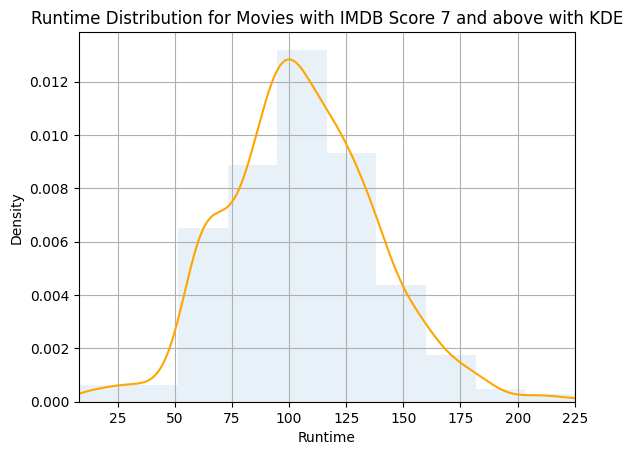

In [128]:
df_7nd_above_mv['runtime'].hist(density=True, bins=10, alpha=0.1) 
df_7nd_above_mv['runtime'].plot(kind='kde', color='orange')
plt.xlabel('Runtime')
plt.xlim(left=8, right=225)
plt.title('Runtime Distribution for Movies with IMDB Score 7 and above with KDE')
plt.grid(True)
plt.show()

In [32]:
df_7nd_above_mv['runtime'].count()

1002

In [33]:
t1 = np.arange(125, 151)
print(t1)
round(np.median(t1))

[125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150]


138

In [34]:
movies_runtime = df_7nd_above_mv[(df_7nd_above_mv['runtime'] >= 70) & (df_7nd_above_mv['runtime'] <= 138)].sort_values(by='runtime')
movies_runtime

,title,type,runtime,genres,production_countries,seasons,imdb_score
1134,Tea Time,MOVIE,70,['documentation'],['CL'],NaN,7.6
3518,Tom Segura: Ball Hog,MOVIE,70,['comedy'],['US'],NaN,7.3
1780,Jim Jefferies: This Is Me Now,MOVIE,70,['comedy'],['US'],NaN,7.4
2989,John Mulaney & The Sack Lunch Bunch,MOVIE,70,"['comedy', 'family']",['US'],NaN,7.4
1689,Marc Maron: Too Real,MOVIE,70,['comedy'],['US'],NaN,7.2
...,...,...,...,...,...,...,...
3061,The Devil All the Time,MOVIE,138,"['drama', 'thriller', 'crime', 'horror']",['US'],NaN,7.1
340,Jab We Met,MOVIE,138,"['romance', 'comedy', 'drama']",['IN'],NaN,7.9
3956,Sillu Karupatti,MOVIE,138,"['romance', 'drama']",['IN'],NaN,8.0
375,Wake Up Sid,MOVIE,138,"['comedy', 'drama', 'romance']",['IN'],NaN,7.6


In [35]:
for i in dict_genre['genre']:
    count_genres(i, movies_runtime)

drama genre count is: 388
thriller genre count is: 93
horror genre count is: 19
comedy genre count is: 231
romance genre count is: 104
sport genre count is: 43
family genre count is: 54
animation genre count is: 44
reality genre count is: 1
scifi genre count is: 24
documentation genre count is: 250
history genre count is: 58
action genre count is: 77
crime genre count is: 90


In [36]:
movies_runtime['imdb_score'].value_counts()

imdb_score
7.0    89
7.2    85
7.1    85
7.3    81
7.4    75
7.5    58
7.6    51
7.7    37
7.8    31
8.1    28
7.9    25
8.0    24
8.2    15
8.4     8
8.3     7
8.6     4
8.9     2
8.5     2
8.7     1
8.8     1
Name: count, dtype: int64

In [37]:
movies_runtime.shape

(709, 7)

# Analyzing Temporal trends

In [38]:
og_df = pd.read_csv('titles.csv')
og_df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406


In [39]:
og_df['release_year'].isna().sum()

0

In [40]:
og_df['release_year'].min(), og_df['release_year'].max() 

(1945, 2023)

In [41]:
og_df['release_year'].value_counts()

release_year
2022    915
2021    868
2020    829
2019    788
2018    743
       ... 
1974      1
1963      1
1956      1
1970      1
1945      1
Name: count, Length: 62, dtype: int64

In [42]:
og_df['release_year'].median()

2019.0

In [43]:
og_df['release_year'].mode()

0    2022
Name: release_year, dtype: int64

In [44]:
og_df['imdb_score'].isna().sum()

468

In [45]:
og_df.shape

(6137, 15)

In [46]:
df_temp_a = og_df[og_df['imdb_score'].isna() == False]
df_temp_a.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020


In [47]:
df_temp_a['release_year'].isna().sum()

0

In [48]:
decade_1 = df_temp_a[(df_temp_a['release_year'] >= 2001) & (df_temp_a['release_year'] <= 2010)].sort_values(by='release_year') 
decade_1.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
317,tm44634,Kevin James: Sweat the Small Stuff,MOVIE,"Television's ""King of Queens"" reigns again in ...",2001,NaN,42,"['comedy', 'documentation']",['US'],NaN,tt0305727,7.4,1112.0,1.738,7.100
351,tm36475,Kabhi Khushi Kabhie Gham,MOVIE,Years after his father disowns his adopted bro...,2001,G,210,"['drama', 'comedy', 'romance']",['IN'],NaN,tt0248126,7.4,51658.0,22.126,7.800
462,tm51493,Vizontele,MOVIE,The story takes place in a small town (called ...,2001,NaN,66,"['comedy', 'drama']",['TR'],NaN,tt0270053,8.0,37381.0,6.165,7.217


In [49]:
decade_1['type'].value_counts()

type
MOVIE    235
SHOW      96
Name: count, dtype: int64

In [50]:
decade_1 = decade_1[decade_1['type'] == 'MOVIE']
decade_1.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
317,tm44634,Kevin James: Sweat the Small Stuff,MOVIE,"Television's ""King of Queens"" reigns again in ...",2001,NaN,42,"['comedy', 'documentation']",['US'],NaN,tt0305727,7.4,1112.0,1.738,7.1
351,tm36475,Kabhi Khushi Kabhie Gham,MOVIE,Years after his father disowns his adopted bro...,2001,G,210,"['drama', 'comedy', 'romance']",['IN'],NaN,tt0248126,7.4,51658.0,22.126,7.8


In [51]:
decade_1['type'].value_counts()

type
MOVIE    235
Name: count, dtype: int64

In [52]:
decade_2 = df_temp_a[(df_temp_a['release_year'] >= 2011) & (df_temp_a['release_year'] <= 2020)].sort_values(by='release_year') 
decade_2.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
530,ts20660,Shameless,SHOW,Chicagoan Frank Gallagher is the proud single ...,2011,TV-MA,54,"['drama', 'comedy']",['US'],11.0,tt1586680,8.6,248907.0,395.633,8.144
623,tm176128,Don't Go Breaking My Heart,MOVIE,"An original twist on an eternal triangle, wher...",2011,NaN,115,"['comedy', 'romance']",['HK'],NaN,tt1776143,6.5,1869.0,4.181,6.500
622,tm177958,Pyaar Ka Punchnama,MOVIE,Nishant starts dating Charu while his roommate...,2011,PG-13,149,"['drama', 'comedy', 'romance', 'european']",['IN'],NaN,tt1926313,7.6,21972.0,6.527,6.900


In [53]:
decade_2 = decade_2[decade_2['type'] == 'MOVIE']
decade_2.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
623,tm176128,Don't Go Breaking My Heart,MOVIE,"An original twist on an eternal triangle, wher...",2011,NaN,115,"['comedy', 'romance']",['HK'],NaN,tt1776143,6.5,1869.0,4.181,6.5
622,tm177958,Pyaar Ka Punchnama,MOVIE,Nishant starts dating Charu while his roommate...,2011,PG-13,149,"['drama', 'comedy', 'romance', 'european']",['IN'],NaN,tt1926313,7.6,21972.0,6.527,6.9


In [54]:
decade_2['type'].value_counts()

type
MOVIE    2102
Name: count, dtype: int64

In [55]:
decade_1['release_year'].value_counts()

release_year
2009    36
2010    35
2008    34
2004    26
2006    26
2007    26
2005    19
2001    12
2002    11
2003    10
Name: count, dtype: int64

In [56]:
decade_2['release_year'].value_counts()

release_year
2018    429
2020    429
2019    419
2017    290
2016    176
2015    111
2014     92
2013     72
2012     48
2011     36
Name: count, dtype: int64

In [57]:
decade_1['release_year'].value_counts().sum(), decade_2['release_year'].value_counts().sum()

(235, 2102)

In [58]:
decade_1['imdb_score'].median(), decade_2['imdb_score'].median()

(6.8, 6.4)

In [59]:
decade_1['imdb_score'].min()

3.2

In [60]:
decade_1['imdb_score']

317    7.4
351    7.4
462    8.0
265    5.1
402    8.1
      ... 
482    7.5
271    5.8
414    5.3
264    6.4
465    8.1
Name: imdb_score, Length: 235, dtype: float64

In [61]:
decade_1[(decade_1['imdb_score'] >= 8.0) & (decade_1['imdb_score'] <= 8.9) & (decade_1['release_year'] == 2002)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
330,tm114504,The Legend of Bhagat Singh,MOVIE,"Born in British India, Bhagat Singh witnesses ...",2002,NaN,155,"['drama', 'action', 'history']",['IN'],NaN,tt0319736,8.2,16748.0,4.270,6.906
208,tm115982,The Lord of the Rings: The Two Towers,MOVIE,Frodo and Sam are trekking to Mordor to destro...,2002,PG-13,179,"['action', 'fantasy', 'drama']","['NZ', 'US']",NaN,tt0167261,8.8,1684864.0,87.778,8.375
466,tm112235,Kannathil Muthamittal,MOVIE,A little girl is told by her parents that she ...,2002,NaN,137,"['drama', 'action', 'war']",['IN'],NaN,tt0312859,8.4,8775.0,5.018,7.600


In [62]:
decade_1[(decade_1['release_year'] == 2002)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
262,tm109495,Spirit: Stallion of the Cimarron,MOVIE,As a wild stallion travels across the frontier...,2002,G,82,"['western', 'animation', 'drama', 'family']",['US'],NaN,tt0166813,7.2,78881.0,66.623,7.692
438,tm105278,Inuyasha the Movie 2: The Castle Beyond the Lo...,MOVIE,"With their most formidable foe vanquished, Inu...",2002,PG-13,100,"['animation', 'action', 'romance', 'comedy']",['JP'],NaN,tt0366621,7.3,2213.0,22.493,7.700
330,tm114504,The Legend of Bhagat Singh,MOVIE,"Born in British India, Bhagat Singh witnesses ...",2002,NaN,155,"['drama', 'action', 'history']",['IN'],NaN,tt0319736,8.2,16748.0,4.270,6.906
215,tm105329,Road to Perdition,MOVIE,Mike Sullivan works as a hit man for crime bos...,2002,R,117,"['thriller', 'drama', 'documentation', 'crime']",['US'],NaN,tt0257044,7.7,273370.0,21.732,7.359
246,tm109300,Resident Evil,MOVIE,"When a virus leaks from a top-secret facility,...",2002,R,100,"['horror', 'action', 'scifi', 'european']","['FR', 'DE', 'GB', 'CA']",NaN,tt0120804,6.6,275939.0,22.082,6.601
473,tm110923,Divine Intervention,MOVIE,Santa Claus tries to outrun a gang of knife-wi...,2002,NaN,92,"['drama', 'comedy', 'romance', 'war']","['MA', 'DE', 'PS', 'FR']",NaN,tt0317721,6.6,3598.0,3.956,6.400
208,tm115982,The Lord of the Rings: The Two Towers,MOVIE,Frodo and Sam are trekking to Mordor to destro...,2002,PG-13,179,"['action', 'fantasy', 'drama']","['NZ', 'US']",NaN,tt0167261,8.8,1684864.0,87.778,8.375
466,tm112235,Kannathil Muthamittal,MOVIE,A little girl is told by her parents that she ...,2002,NaN,137,"['drama', 'action', 'war']",['IN'],NaN,tt0312859,8.4,8775.0,5.018,7.600
371,tm112381,Comedian,MOVIE,"A look at the work of two stand-up comics, Jer...",2002,R,82,"['comedy', 'documentation']",['US'],NaN,tt0328962,6.9,7110.0,8.574,6.700
199,tm113842,Minority Report,MOVIE,John Anderton is a top 'Precrime' cop in the l...,2002,PG-13,144,"['thriller', 'action', 'crime', 'scifi']",['US'],NaN,tt0181689,7.6,560336.0,27.119,7.331


# Scatter plots

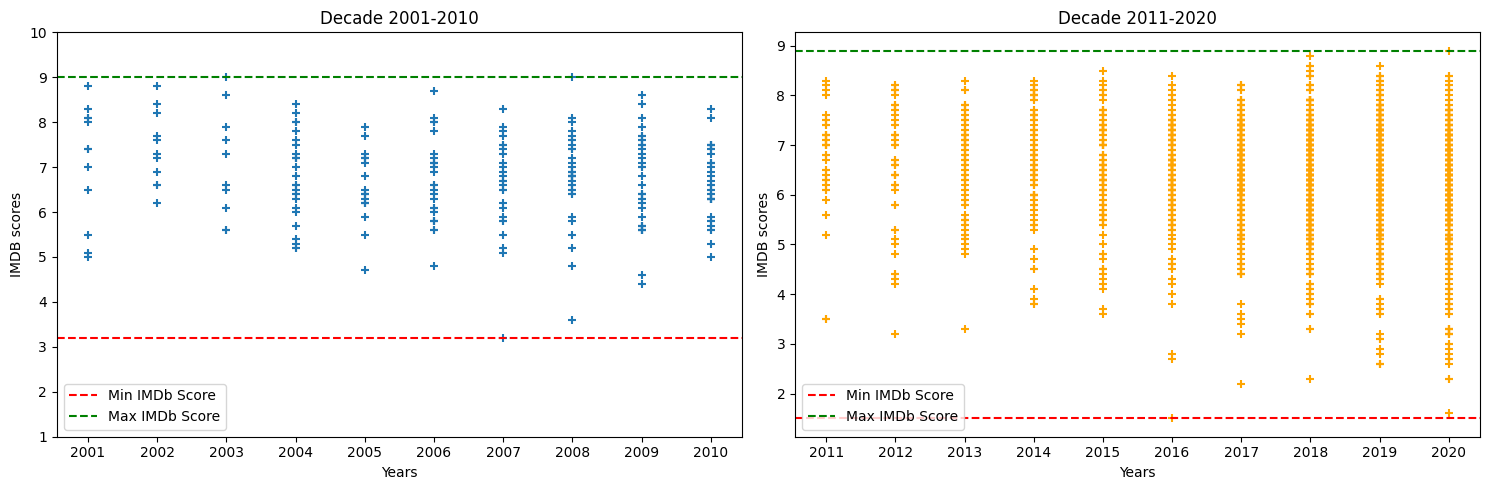

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(decade_1['release_year'], decade_1['imdb_score'], marker='+')
axes[0].set_ylim(bottom=1, top=10)
axes[0].set_title('Decade 2001-2010')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('IMDB scores')
axes[0].axhline(y=decade_1['imdb_score'].min(), color='red', linestyle='--', label=f'Min IMDb Score')
axes[0].axhline(y=decade_1['imdb_score'].max(), color='green', linestyle='--', label=f'Max IMDb Score')
axes[0].legend()
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(1))

axes[1].scatter(decade_2['release_year'], decade_2['imdb_score'], marker='+', color='orange')
axes[0].set_ylim(bottom=1, top=10)
axes[1].set_title('Decade 2011-2020')
axes[1].set_xlabel('Years')
axes[1].set_ylabel('IMDB scores')
axes[1].axhline(y=decade_2['imdb_score'].min(), color='red', linestyle='--', label=f'Min IMDb Score')
axes[1].axhline(y=decade_2['imdb_score'].max(), color='green', linestyle='--', label=f'Max IMDb Score')
axes[1].legend()
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()


In [64]:
decade_1.shape[0], decade_2.shape[0]

(235, 2102)

In [65]:
two_decades = pd.concat([decade_1, decade_2], axis=0)
two_decades.shape

(2337, 15)

In [66]:
two_decades['release_year'].isna().sum()

0

In [67]:
two_decades['release_year'].min()

2001

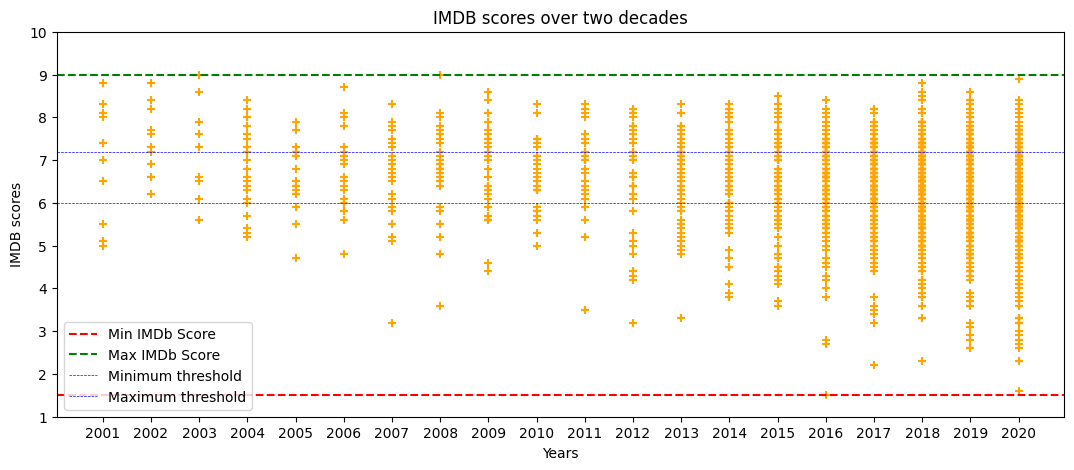

In [121]:
years = np.arange(two_decades['release_year'].min(), two_decades['release_year'].max() + 1)
plt.figure(figsize=(13, 5))
plt.title('IMDB scores over two decades')
plt.ylim(top=10, bottom=1)
plt.ylabel('IMDB scores')
plt.xlabel('Years')
plt.scatter(two_decades['release_year'], two_decades['imdb_score'], marker='+', color='orange')
plt.axhline(y=two_decades['imdb_score'].min(), color='red', linestyle='--', label='Min IMDb Score')
plt.axhline(y=two_decades['imdb_score'].max(), color='green', linestyle='--', label='Max IMDb Score')
plt.axhline(y=[6.0], color='maroon', linestyle='--', label='Minimum threshold', linewidth=0.5)
plt.axhline(y=[7.2], color='blue', linestyle='--', label='Maximum threshold', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()


In [83]:
decade_2[(decade_2['release_year'] == 2020)].head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3901,tm882700,Not a Game,MOVIE,This documentary offers an honest look at our ...,2020,NaN,92,"['documentation', 'drama']",['ES'],NaN,tt14637704,7.0,7.0,3.058,4.7
3932,tm982569,London Hughes: To Catch A D*ck,MOVIE,"London Hughes, the sauciest comedian to come o...",2020,NaN,60,['comedy'],['US'],NaN,tt13528526,4.7,334.0,3.475,6.6


In [70]:
two_decades.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [84]:
year_2017 = decade_2[['title', 'imdb_score', 'genres']][(decade_2['imdb_score'] >= 6.5) & (decade_2['imdb_score'] <= 7.5) & (decade_2['release_year'] == 2017)]
year_2017.head(3)

,title,imdb_score,genres
1854,Bareilly Ki Barfi,7.5,"['comedy', 'romance']"
1845,Okja,7.3,"['fantasy', 'scifi', 'action', 'drama']"
1840,Jim Norton: Mouthful of Shame,7.0,['comedy']


In [91]:
year_2017.shape

(116, 3)

In [87]:
year_2017['genres'].values

array(["['comedy', 'romance']", "['fantasy', 'scifi', 'action', 'drama']",
       "['comedy']", "['comedy']", "['comedy']", "['comedy']",
       "['romance', 'comedy', 'drama']",
       "['thriller', 'comedy', 'crime']", "['comedy', 'documentation']",
       "['drama', 'action', 'thriller', 'crime']",
       "['drama', 'crime', 'thriller', 'comedy', 'european']",
       "['drama', 'history', 'war']", "['comedy']",
       "['comedy', 'documentation']", "['documentation']",
       "['documentation']", "['comedy']", "['documentation']",
       "['romance', 'comedy', 'action', 'drama', 'family']",
       "['music', 'documentation']", "['documentation', 'european']",
       "['thriller', 'drama', 'comedy', 'crime', 'european']",
       "['documentation']", "['comedy', 'documentation']",
       "['comedy', 'documentation']", "['comedy', 'documentation']",
       "['horror', 'thriller', 'drama']", "['comedy']", "['comedy']",
       "['animation', 'action', 'drama', 'scifi', 'thriller']",
    

In [88]:
dict_genre = {'genre': ['drama', 'thriller', 'horror', 'comedy', 'romance', 'sport', 'family', 'animation', 'reality',
                        'scifi', 'documentation', 'history', 'action', 'crime', 'music', 'war', 'european']}
for i in dict_genre['genre']:
    count_genres(i, year_2017)

drama genre count is: 53
thriller genre count is: 23
horror genre count is: 4
comedy genre count is: 55
romance genre count is: 19
sport genre count is: 3
family genre count is: 5
animation genre count is: 3
reality genre count is: 0
scifi genre count is: 4
documentation genre count is: 33
history genre count is: 9
action genre count is: 12
crime genre count is: 14
music genre count is: 4
war genre count is: 7
european genre count is: 15


In [102]:
year_2018 = decade_2[['title', 'imdb_score', 'genres', 'release_year']][(decade_2['imdb_score'] >= 6.0) & (decade_2['imdb_score'] <= 7.5) & (decade_2['release_year'] == 2018)]
year_2018.head(3)

,title,imdb_score,genres,release_year
2243,Mercury 13,6.9,['documentation'],2018
2579,#FriendButMarried,6.8,"['comedy', 'drama', 'romance']",2018
2577,Dear Son,6.5,['drama'],2018


In [96]:
year_2018.shape

(233, 3)

In [99]:
year_2018['genres'].values

array(["['documentation']", "['comedy', 'drama', 'romance']", "['drama']",
       "['drama', 'romance']", "['comedy', 'crime', 'european']",
       "['horror', 'comedy']", "['music', 'documentation']",
       "['drama', 'european']",
       "['animation', 'family', 'drama', 'western', 'european']",
       "['comedy', 'family', 'european']", "['drama', 'crime']",
       "['drama']", "['documentation']", "['documentation', 'european']",
       "['drama', 'european']", "['comedy']",
       "['drama', 'fantasy', 'romance', 'thriller', 'european']",
       "['drama']", "['animation', 'family', 'fantasy', 'european']",
       "['comedy', 'romance']", "['comedy']",
       "['drama', 'comedy', 'crime', 'romance', 'action']", "['drama']",
       "['drama']", "['drama', 'european']", "['drama', 'thriller']",
       "['documentation']", "['drama']", "['thriller', 'drama']",
       "['drama']", "['comedy']", "['documentation']", "['comedy']",
       "['documentation', 'european']", "['comedy', 'dr

In [100]:
for i in dict_genre['genre']:
    count_genres(i, year_2018)

drama genre count is: 132
thriller genre count is: 37
horror genre count is: 8
comedy genre count is: 95
romance genre count is: 42
sport genre count is: 5
family genre count is: 14
animation genre count is: 9
reality genre count is: 1
scifi genre count is: 7
documentation genre count is: 41
history genre count is: 13
action genre count is: 26
crime genre count is: 28
music genre count is: 12
war genre count is: 8
european genre count is: 52


In [109]:
year_2019 = decade_2[['title', 'imdb_score', 'genres']][(decade_2['imdb_score'] >= 6.0) & (decade_2['imdb_score'] <= 7.5) & (decade_2['release_year'] == 2019)]
year_2019.head(3)

,title,imdb_score,genres
3535,Nikki Glaser: Bangin',6.1,['comedy']
3532,The Fable,6.5,"['comedy', 'action']"
3517,Kardec,6.1,"['history', 'drama']"


In [111]:
year_2019.shape

(217, 3)

In [112]:
year_2019['genres'].values

array(["['comedy']", "['comedy', 'action']", "['history', 'drama']",
       "['history', 'war', 'documentation']", "['comedy']",
       "['drama', 'romance']", "['crime', 'thriller', 'drama']",
       "['drama', 'action', 'thriller', 'crime', 'european']",
       "['drama', 'sport']", "['comedy']", "['comedy']", "['comedy']",
       "['drama', 'crime', 'european']",
       "['horror', 'thriller', 'drama', 'music']",
       "['documentation', 'drama']", "['drama', 'sport']",
       "['documentation']",
       "['comedy', 'drama', 'romance', 'thriller', 'crime', 'european']",
       "['animation', 'scifi', 'family', 'drama', 'fantasy']",
       "['drama']", "['music', 'documentation', 'history']", "['drama']",
       "['comedy']", "['comedy', 'romance', 'european']",
       "['drama', 'romance']",
       "['action', 'fantasy', 'animation', 'family', 'romance']",
       "['thriller', 'action', 'drama', 'war', 'scifi', 'european']",
       "['comedy']", "['comedy']",
       "['comedy', 'fa

In [114]:
for i in dict_genre['genre']:
    count_genres(i, year_2019)

drama genre count is: 117
thriller genre count is: 37
horror genre count is: 8
comedy genre count is: 86
romance genre count is: 39
sport genre count is: 6
family genre count is: 10
animation genre count is: 13
reality genre count is: 0
scifi genre count is: 13
documentation genre count is: 43
history genre count is: 15
action genre count is: 28
crime genre count is: 29
music genre count is: 16
war genre count is: 8
european genre count is: 24


In [122]:
year_2020 = decade_2[['title', 'imdb_score', 'genres']][(decade_2['imdb_score'] >= 6.0) & (decade_2['imdb_score'] <= 7.2) & (decade_2['release_year'] == 2020)]
year_2020.head(3)

,title,imdb_score,genres
3901,Not a Game,7.0,"['documentation', 'drama']"
3931,Giving Voice,6.9,['documentation']
3772,18 Presents,6.9,"['drama', 'european']"


In [123]:
year_2020.shape

(199, 3)

In [124]:
year_2020['genres'].values

array(["['documentation', 'drama']", "['documentation']",
       "['drama', 'european']", "['thriller', 'drama']",
       "['animation', 'comedy', 'family']", "['drama', 'comedy']",
       "['drama', 'comedy']", "['documentation']",
       "['action', 'thriller', 'crime']", "['music', 'documentation']",
       "['crime', 'thriller']", "['thriller', 'horror', 'drama']",
       "['music']", "['drama', 'comedy']",
       "['action', 'thriller', 'crime', 'drama', 'scifi']",
       "['drama', 'comedy']", "['drama']",
       "['animation', 'family', 'comedy', 'drama']", "['drama']",
       "['animation']", "['drama', 'sport', 'thriller', 'action']",
       "['music', 'comedy', 'drama']",
       "['action', 'drama', 'fantasy', 'romance', 'scifi', 'thriller']",
       "['animation', 'comedy', 'action', 'drama']",
       "['action', 'comedy', 'romance']", "['drama', 'romance']",
       "['drama']", "['scifi', 'thriller', 'crime', 'drama', 'horror']",
       "['comedy']",
       "['animation', '

In [125]:
for i in dict_genre['genre']:
    count_genres(i, year_2020)

drama genre count is: 102
thriller genre count is: 35
horror genre count is: 9
comedy genre count is: 77
romance genre count is: 31
sport genre count is: 5
family genre count is: 23
animation genre count is: 19
reality genre count is: 0
scifi genre count is: 11
documentation genre count is: 42
history genre count is: 10
action genre count is: 26
crime genre count is: 24
music genre count is: 17
war genre count is: 3
european genre count is: 6


In [140]:
higher_score = two_decades[['title', 'imdb_score', 'release_year', 'genres']][two_decades['imdb_score'] >= 8.0]
higher_score

,title,imdb_score,release_year,genres
462,Vizontele,8.0,2001,"['comedy', 'drama']"
402,Dil Chahta Hai,8.1,2001,"['drama', 'comedy', 'romance']"
378,Lagaan: Once Upon a Time in India,8.1,2001,"['drama', 'romance', 'sport']"
195,The Lord of the Rings: The Fellowship of the Ring,8.8,2001,"['fantasy', 'action', 'drama']"
521,Frontiers of Dreams and Fears,8.3,2001,"['documentation', 'history']"
...,...,...,...,...
4183,The Beginning of Life 2: Outside,8.0,2020,['documentation']
3075,Disclosure,8.2,2020,['documentation']
3408,Violet Evergarden: The Movie,8.3,2020,"['fantasy', 'drama', 'animation', 'romance']"
3215,David Attenborough: A Life on Our Planet,8.9,2020,['documentation']


In [139]:
higher_score.shape

(108, 4)

In [138]:
higher_score['release_year'].values

array([2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2003, 2003, 2004,
       2004, 2004, 2004, 2006, 2006, 2006, 2006, 2007, 2008, 2008, 2008,
       2009, 2009, 2009, 2010, 2010, 2011, 2011, 2011, 2011, 2012, 2012,
       2012, 2012, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017,
       2017, 2017, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020,
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020], dtype=int64)

In [141]:
higher_score['genres'].values

array(["['comedy', 'drama']", "['drama', 'comedy', 'romance']",
       "['drama', 'romance', 'sport']", "['fantasy', 'action', 'drama']",
       "['documentation', 'history']", "['drama', 'action', 'history']",
       "['action', 'fantasy', 'drama']", "['drama', 'action', 'war']",
       "['comedy', 'drama']", "['fantasy', 'action', 'drama']",
       "['scifi', 'comedy']", "['drama', 'european']", "['comedy']",
       "['documentation']", "['comedy', 'drama', 'crime', 'history']",
       "['drama', 'european']", "['documentation']",
       "['comedy', 'documentation']", "['drama', 'family']",
       "['thriller', 'drama', 'action', 'crime']",
       "['drama', 'thriller', 'action', 'crime']",
       "['drama', 'comedy', 'action', 'history']", "['animation']",
       "['drama', 'family']", "['drama', 'comedy']", "['comedy']",
       "['drama']", "['drama', 'comedy', 'romance']",
       "['animation', 'action', 'fantasy']", "['drama']", "['drama']",
       "['drama', 'fantasy', 'comedy']

In [142]:
for i in dict_genre['genre']:
    count_genres(i, higher_score)

drama genre count is: 61
thriller genre count is: 14
horror genre count is: 1
comedy genre count is: 35
romance genre count is: 13
sport genre count is: 7
family genre count is: 5
animation genre count is: 6
reality genre count is: 0
scifi genre count is: 2
documentation genre count is: 40
history genre count is: 9
action genre count is: 15
crime genre count is: 15
music genre count is: 8
war genre count is: 4
european genre count is: 7
